In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path



In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
# load dataset
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc").analysed_sst


# get reference ds (2002-2012)
ds_ref = ds.sel(time=slice("2002-01","2012-12"))
# get reference monthly avg climatology for 2002-2012
ds_ref_mean = ds_ref.groupby(ds_ref.time.dt.month).mean()
# get reference monthly sst stdev between 2002 and 2012
ds_ref_std = ds_ref.groupby(ds_ref.time.dt.month).std()

# get length of coordinate directions
_, n_lat, n_lon = ds_ref_mean.shape

In [4]:
# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (10, 40)
plt.rcParams["font.size"] = 6
plt.rcParams['text.usetex'] = False

In [5]:
def plot_monthly_sst(year: int, month: int):
    """
    Inputs:
        year: year to get SST anomalies
        month: month to get SST anomalies
        
    Plots monthly SST anomalies and sends the plot to axes
    """
    
    str_time = str(year) + "-" + str(month)
    
    ds_month = ds.sel(time=str_time).mean("time")
    ds_month_norm = ds_month - ds_ref_mean.sel(month=month)

    # pointwise comparison of delta with std, set to 0 if less than 1 std
    mask = (abs(ds_month_norm) > ds_ref_std[month-1,:,:]).data
    ds_month_norm = ds_month_norm * mask
    # plot data
    plot = ds_month_norm.plot(ax = axes[month-1, year-2014], cmap='coolwarm', vmin=-3, vmax=3, cbar_kwargs={"label": "Delta SST in Degrees Celcius"})
    return plot
    

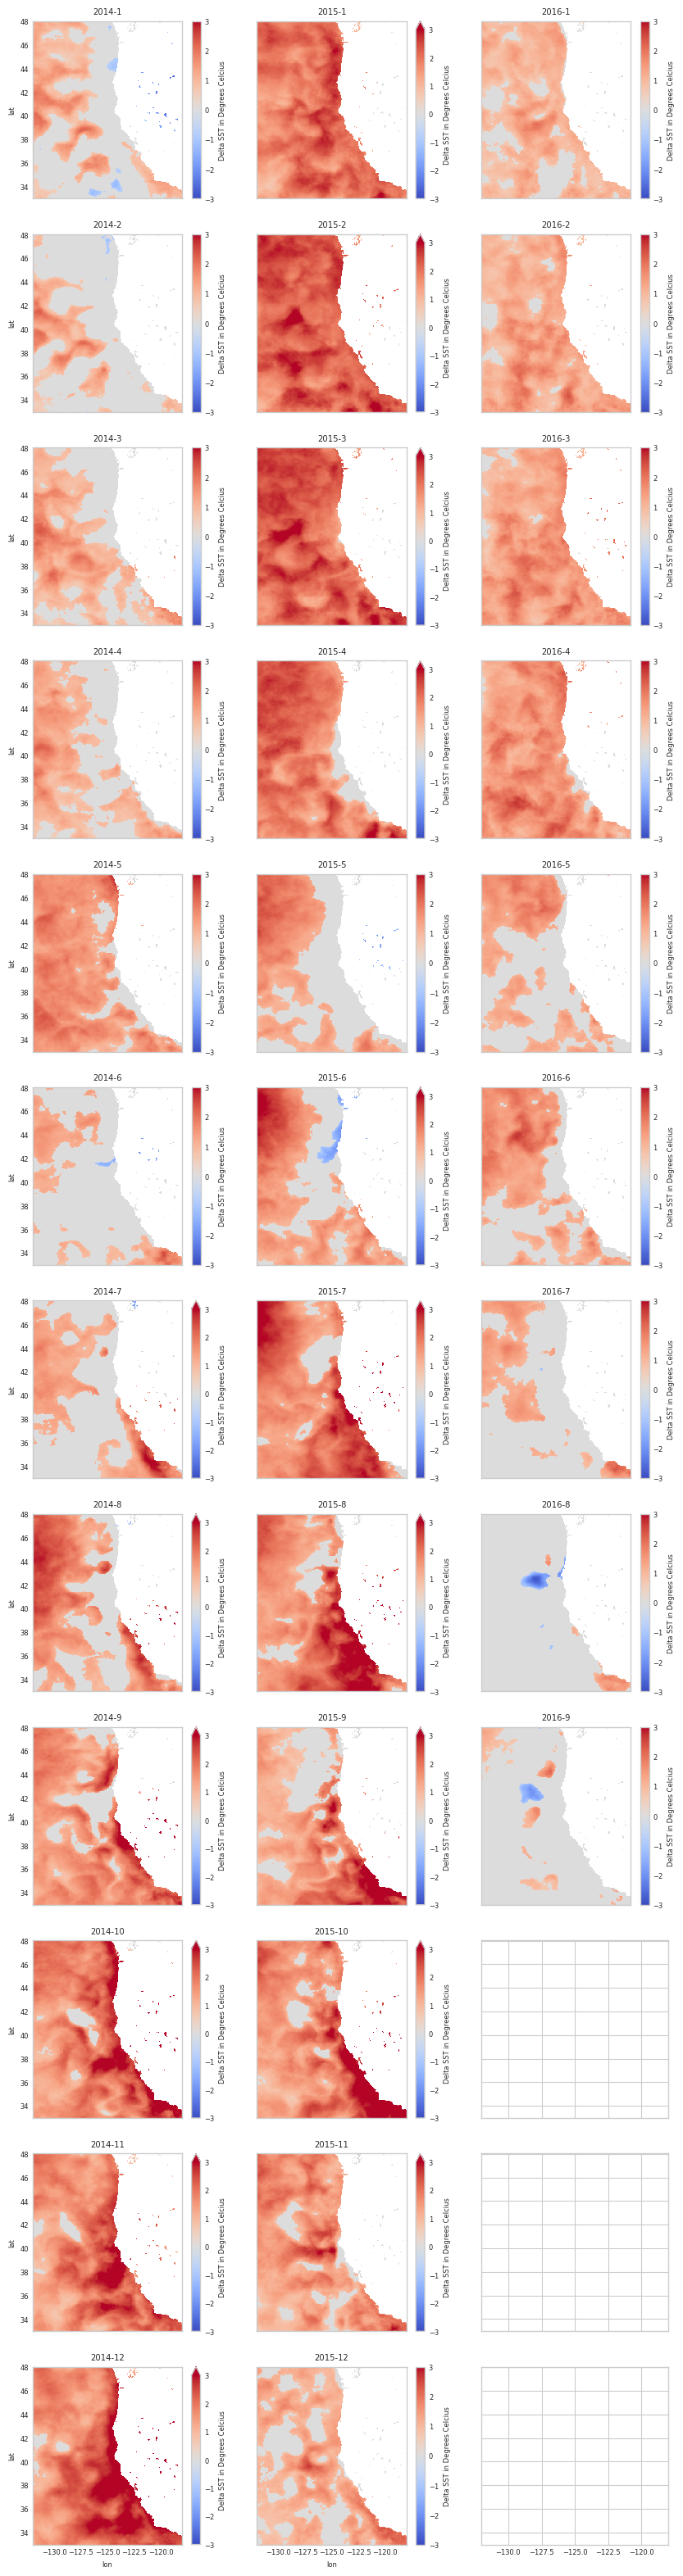

In [6]:
years = np.arange(2014,2017)
months = np.arange(1,13)

fig, axes = plt.subplots(nrows=12, ncols=3, sharex=True, sharey=True, figsize=(10,40))

# loop over each year and month combo to plot the SSTs
for year in years:
    for month in months:
        row = month - 1
        col = year - 2014
        
        plot_monthly_sst(year, month)
        
        # label each subplot
        axes[row, col].set_title(str(year) + "-" + str(month))
        
        # only add axis labels to edge subplots
        if row==11 and col==0:
            axes[row, col].set_xlabel('lon')
            axes[row, col].set_ylabel('lat')
        elif row==11:
            axes[row, col].set_xlabel('lon')
            axes[row, col].set_ylabel('')
        elif col==0:
            axes[row, col].set_xlabel('')
            axes[row, col].set_ylabel('lat')
        else:
            axes[row, col].set_xlabel('')
            axes[row, col].set_ylabel('')
        
        if year==2016 and month==9:
            break

plt.show()